In [1]:
import torch
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.models import ResNet50_Weights
import numpy as np
import torchvision.transforms as transforms        
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter,raps_imagenet_real_scatter, saps_imagenet_real_scatter

#  Reprocess
data_transform = transforms.Compose([
    transforms.CenterCrop(256),
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# load pre-trained model 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1).to(device)

# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=2)
model = ModelWithTemperature(model, temperature = 1.0).to(device)
model.set_temperature(train_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.2

Before temperature - NLL: 1.183, ECE: 0.021
Optimal temperature: 0.987
After temperature - NLL: 1.182, ECE: 0.017


APS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8235 ± 0.0026
Final Average Prediction Set Size: 6.46 ± 0.09
Final Average Coverage: 0.7998 ± 0.0055
Final Average Real Probability: 0.6648 ± 0.0055


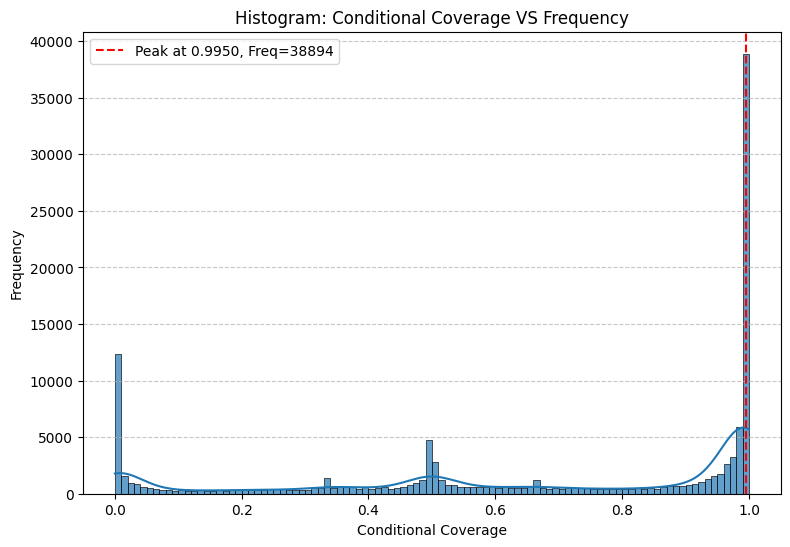

38894 (31.28%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8411 ± 0.0031
Final Average Prediction Set Size: 2.88 ± 0.02
Final Average Coverage: 0.7993 ± 0.0056
Final Average Real Probability: 0.6478 ± 0.0054


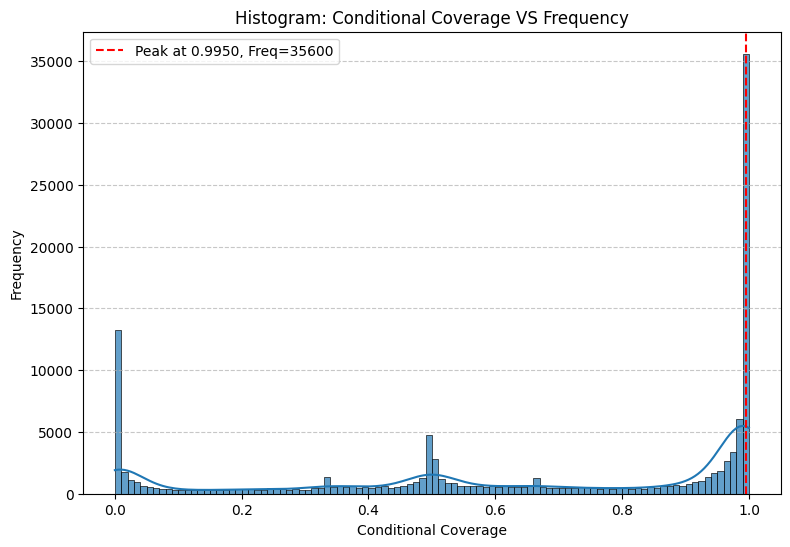

35600 (28.63%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.05, k_reg=9, num_runs=10, alpha=0.2, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8303 ± 0.0041
Final Average Prediction Set Size: 2.39 ± 0.02
Final Average Coverage: 0.7997 ± 0.0056
Final Average Real Probability: 0.6595 ± 0.0048


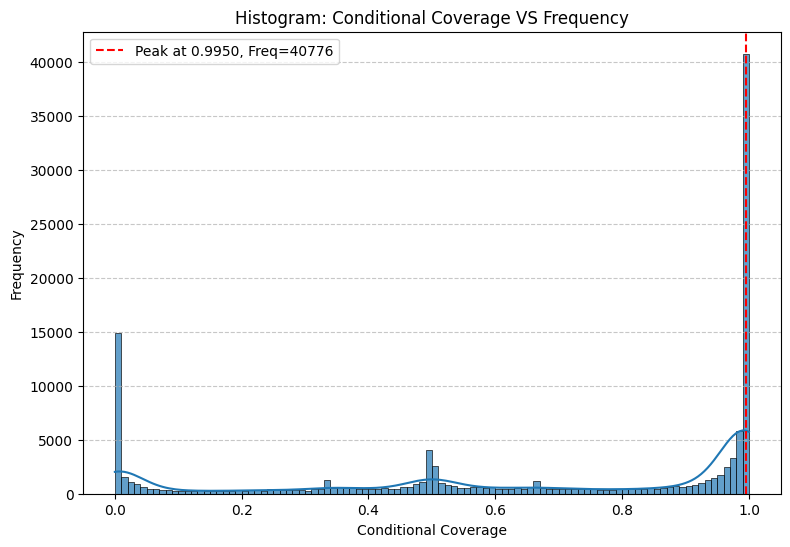

40776 (32.79%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.1, num_runs=10, alpha=0.2, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8235 ± 0.0026
Final Average Prediction Set Size: 6.46 ± 0.09
Final Average Coverage: 0.7998 ± 0.0055
Final Average Real Probability: 0.6648 ± 0.0055


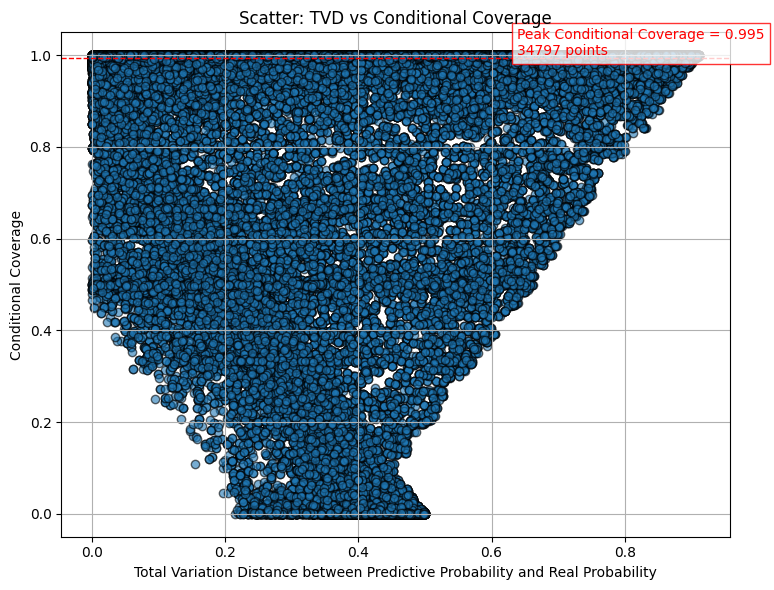

Peak Conditional Coverage = 0.995, with 34797 samples

=== Count Regions Summary ===
37422 (30.1%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
22375 (18.0%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
52011 (41.8%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.89799']
  Real Probability Set      : ['0.99900']
Sample 2:
  Predictive Probability Set: ['0.98258']
  Real Probability Set      : ['0.99635']
Sample 3:
  Predictive Probability Set: ['0.96768']
  Real Probability Set      : ['0.80981']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.77278']
  Real Probability Set      : ['0.16667']
Sample 2:
  Predictive Probability Set: ['0.44147', '0.29683']
  Real Probability Set      : ['0.00131', '0.00131']
Sample 3:
  Predictive Probability Set: ['0.50236']
  Real Probability Set      : ['0.00079']

--- Region 3: medi

In [5]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8411 ± 0.0031
Final Average Prediction Set Size: 2.88 ± 0.02
Final Average Coverage: 0.7993 ± 0.0056
Final Average Real Probability: 0.6478 ± 0.0054


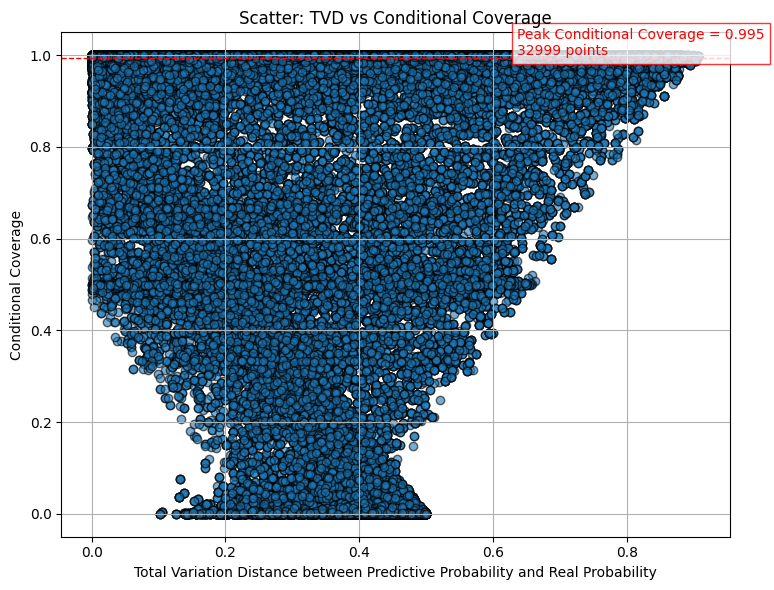

Peak Conditional Coverage = 0.995, with 32999 samples

=== Count Regions Summary ===
39253 (31.6%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
19386 (15.6%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
56205 (45.2%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.58803', '0.41157']
  Real Probability Set      : ['0.55668', '0.44303']
Sample 2:
  Predictive Probability Set: ['0.97743']
  Real Probability Set      : ['0.96676']
Sample 3:
  Predictive Probability Set: ['0.87203']
  Real Probability Set      : ['0.90324']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.79723']
  Real Probability Set      : ['0.00019']
Sample 2:
  Predictive Probability Set: ['0.29592', '0.18230', '0.14309', '0.13429', '0.06906', '0.05518']
  Real Probability Set      : ['0.00909', '0.00000', '0.06869', '0.00969', '0.00969', '0.00969']
Sam

In [6]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.05, k_reg=9, num_runs=10, alpha=0.2)

SAPS Classification on CIFAR10-H(alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8303 ± 0.0041
Final Average Prediction Set Size: 2.39 ± 0.02
Final Average Coverage: 0.7997 ± 0.0056
Final Average Real Probability: 0.6595 ± 0.0048


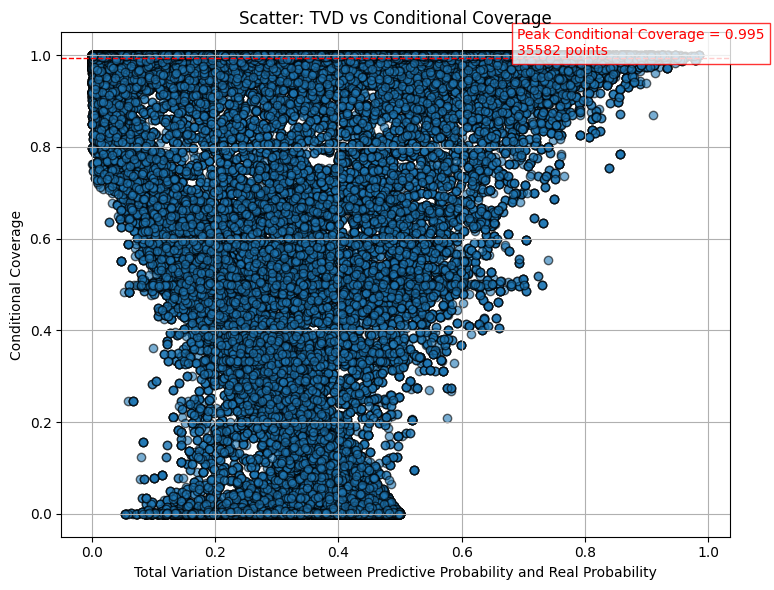

Peak Conditional Coverage = 0.995, with 35582 samples

=== Count Regions Summary ===
41290 (33.2%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
18878 (15.2%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
53234 (42.8%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.98755']
  Real Probability Set      : ['0.99879']
Sample 2:
  Predictive Probability Set: ['0.95503']
  Real Probability Set      : ['0.98233']
Sample 3:
  Predictive Probability Set: ['0.88332']
  Real Probability Set      : ['0.93526']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.87993']
  Real Probability Set      : ['0.14383']
Sample 2:
  Predictive Probability Set: ['0.25082', '0.16564', '0.11856', '0.04977', '0.04339', '0.03566', '0.02599']
  Real Probability Set      : ['0.00000', '0.00052', '0.00130', '0.00000', '0.00000', '0.08461', '0.00052']
Sam

In [7]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.1, num_runs=10, alpha=0.2)